### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write up, download this file as a PDF or HTML file and submit in the next section.


(1) What is the independent variable? What is the dependent variable?

The independent variables are the test conditions (Congurent and Incongurent). The independent variable is the time (in seconds) the participants take to name the colors of ink in the words.

(2) What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

The null hypothesis $H_{0}$ is that there is no significant difference between the pediods of time the participants take to name the color, so the reaction time (RT) for congruent and incongruent words are almost the same. The alternative hypothesis $H_{1}$ is that the participants need to take more time to name the color of the ink for incongruent words, so, the average reaction time is significantly longer. μc represents the reaction time under congruent conditions and μi represents the reaction time under incongruent conditions in my formula.

$H_{0}$:μi−μc=0

$H_{1}$:μi−μc≠0

I need to perform a dependent two-tailed t-test to analyze the reaction time of the participants under the two different conditions and test the $H_{0}$ hypothesis. Dependent test means that the same groups are tested under different conditions, on two occassions, so we work with two "related" groups and examine the differences between the means. The first time the participants' reaction time is tested under congruent word conditions, the second time under incongruent word conditions. 

I use a two-taled test. According to the null hypothesis, the dependent variables are equal under the two test conditions and we do not make any choice over the direction where the results of the second experiment take. It can be whether negative or positive, as our alternative hypothesis implies only the difference between the results. The designated significance level is α = 0.05, under that we will fail to reject the null hypothesis. 

Sources:

https://statistics.laerd.com/statistical-guides/dependent-t-test-statistical-guide.php

https://statistics.laerd.com/statistical-guides/hypothesis-testing-3.php


(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
%matplotlib inline

df = pd.read_csv('stroopdata.csv')
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


I calculated the means of reaction time for Congruent and Incongruent test conditions.

In [25]:
congruent_mean = df['Congruent'].mean()
print(congruent_mean)

14.051125


In [26]:
incongruent_mean = df['Incongruent'].mean()
print(incongruent_mean)

22.0159166667


I calculated the standard deviation of reaction time for Congruent and Incongruent test conditions. I used Python's statistics module to get the sample standard deviation.

Source: https://docs.python.org/3/library/statistics.html

In [27]:
congruent_list = df['Congruent']

sample_std_con = statistics.stdev(congruent_list)

print(sample_std_con)

3.5593579576451955


In [28]:
incongruent_list = df['Incongruent']

sample_std_incon = statistics.stdev(incongruent_list)

print(sample_std_incon)

4.7970571224691385


I calculated the sample variance of reaction time for Congruent and Incongruent test conditions. I used Python's statistics module to get the sample variance.

In [29]:
statistics.variance(congruent_list)

12.669029070652176

In [30]:
statistics.variance(incongruent_list)

23.011757036231888

I also calculated the difference of avareges to get the observed difference between the two test cases.

In [31]:
obs_diff_mean = incongruent_mean - congruent_mean
print(obs_diff_mean)

7.96479166667


(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

At first I made a visualization about the ditribution of the reaction times for congruent and incongruent condition. I used the congruent_list and incongruent_list variables. According to my results, the reaction time can be longer under incongruent word conditions.

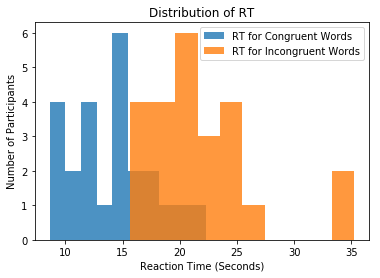

In [32]:
plt.hist(congruent_list, alpha=0.8, label='RT for Congruent Words')
plt.hist(incongruent_list, alpha=0.8, label='RT for Incongruent Words')
plt.xlabel('Reaction Time (Seconds)')
plt.ylabel('Number of Participants')
plt.title('Distribution of RT')
plt.legend(loc='upper right')
plt.show()

I made a linechart about the differences of patricipants' reaction time under congruent and incongruent conditions. Based on my visualisation, the rougly estimated differences are between 2 and 22 seconds. The diagram indicates that there is a significant difference between the participants' reaction times under the two conditions so I expect that after further analysis we should reject the null hypothesis. Moreover, another significant difference can be observed if we compare each partisipant's performances one by one, which indicates a bigger variance.

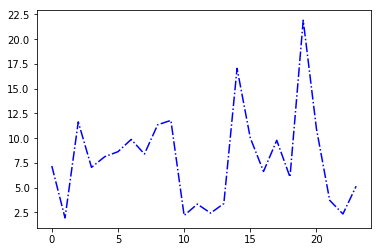

In [33]:
# plot the differences between the average reaction time

difference = df['Incongruent'] - df['Congruent']
plt.plot(difference, color='blue', linestyle = 'dashdot')

(5) Now, perform the statistical test and report the results. What is the confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

I bootstrapped the differences of means for congruent and incongruent word conditions to get normally disributed values for further analysis.

In [10]:
diffs = []

for i in range(10000):
    sample = df.sample(df.shape[0], replace = True)
    incon_sample = sample['Incongruent'].mean()
    con_sample = sample['Congruent'].mean()
    diff = incon_sample - con_sample
    diffs.append(diff)

I made a histogram about the differences just to take a quick look at the distribution and the mean. The mean value of my histogram is about 8 and I can hardly see any value around 0.

Text(0.5,1,'Distribution of Reaction Time')

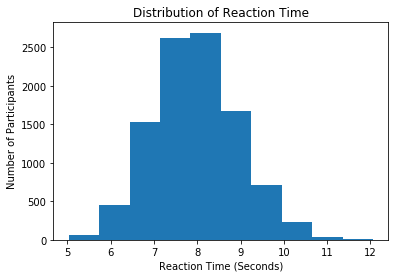

In [11]:
diffs_arr = np.asarray(diffs)

plt.hist(diffs_arr)
plt.xlabel('Reaction Time (Seconds)')
plt.ylabel('Number of Participants')
plt.title('Distribution of Reaction Time')

Simulate distribution under the null hypothesis, with the size of the boostrapped differences and with the calculated standard deviation.

In [12]:
null_vals = np.random.normal(0, diffs_arr.std(), diffs_arr.size)

I plotted the null distibution and marked the mean of the observed differences with a red line. Based on the visualisation, the observed differences are far from the differences simulated under the null hypothesis which indicates a big difference between the observed values and the values of the null hypothesis.

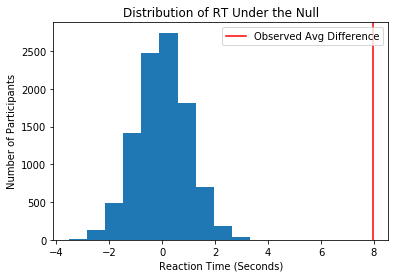

In [14]:
plt.hist(null_vals)
plt.axvline(x = incongruent_mean-congruent_mean, color = 'red', label = 'Observed Avg Difference')
plt.xlabel('Reaction Time (Seconds)')
plt.ylabel('Number of Participants')
plt.title('Distribution of RT Under the Null')
plt.legend()
plt.show()

In [21]:
(null_vals > diffs_arr).mean()

0.0

## Conclusion ##



As a conclusion, we can state that based on our p-value calculation and the visualization, we reject the null hypothesis. The p-value is zero which is less than our significance level, indicating that there are not any values in the statistics which could match with the values generated under the null hypothesis. This also correlates with the line chart I created of the differences in the question 4 earlier. According to our observations, we can conclude that the participants' reaction time under incorgruent conditions is longer. This conclusion matches up with my expectation and also highlights some interesting parts of psychology and brain functions.